# Experiments using classifiers to evaluate teh affectivness of the models

## Section A - Dataset configuration

In [1]:
import numpy as np 
import kagglehub

pathA = kagglehub.dataset_download("dextershepherd/3d-texture-gel-tactip")
print(pathA)


/its/home/drs25/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.62G/2.62G [01:17<00:00, 36.5MB/s]

Extracting files...


/its/home/drs25/.cache/kagglehub/datasets/dextershepherd/3d-texture-gel-tactip/versions/2


In [2]:
import subprocess
result = subprocess.run(["mv", pathA, "/mnt/data0/drs25/data/3d/"], capture_output=True, text=True)
pathA="/mnt/data0/drs25/data/3d/"

### create lienar data

In [13]:
datapath="/mnt/data0/drs25/data/3d/2/"
import os 
import pandas as pd 
import numpy as np
import cv2 
files=os.listdir(datapath)
dataset= pd.DataFrame({
    'Index':[],
    'Filament':[],
    'Pattern':[],
    'Printer':[],
    "Pressure":[]
})
X=[]
idx=0
percentage=0.4
for i,file in enumerate(files):
    data=np.load(datapath+"/"+file)
    info=file.replace(".npy","").split("_")
    data=data.reshape((1*2*5*5,480,640,3))
    print(file,data.shape)
    for image in data:
        gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
        h=int(image.shape[0]*percentage)
        w=int(image.shape[1]*percentage)
        gray = cv2.resize(gray,(w,h),interpolation=cv2.INTER_AREA)
        X.append(gray)
        new_row = pd.DataFrame([{
        'Index': int(idx),
        'Filament': info[0],
        'Pattern': info[1],
        'Printer': info[3],
        'Pressure': info[2]
    }])
        idx+=1
        dataset = pd.concat([dataset, new_row], ignore_index=True)

dataset.head()
X=np.array(X).reshape(len(X),1,h,w)
np.save("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrintedXgel",X)
dataset.to_csv("/its/home/drs25/3D-textures/Experimental/data/metagel.csv")
print(X.shape,len(dataset))

PLAminus_z0_P30_Bambu.npy (50, 480, 640, 3)
PLAminus_z0_P30_Ender.npy (50, 480, 640, 3)
PLAminus_z0_P30_crealty.npy (50, 480, 640, 3)
PLAminus_z0_P40_Bambu.npy (50, 480, 640, 3)
PLAminus_z0_P40_Ender.npy (50, 480, 640, 3)
PLAminus_z0_P40_crealty.npy (50, 480, 640, 3)
PLAminus_z1_P30_Bambu.npy (50, 480, 640, 3)
PLAminus_z1_P30_Ender.npy (50, 480, 640, 3)
PLAminus_z1_P30_crealty.npy (50, 480, 640, 3)
PLAminus_z1_P40_Bambu.npy (50, 480, 640, 3)
PLAminus_z1_P40_Ender.npy (50, 480, 640, 3)
PLAminus_z1_P40_crealty.npy (50, 480, 640, 3)
PLAminus_z2_P30_Bambu.npy (50, 480, 640, 3)
PLAminus_z2_P30_Ender.npy (50, 480, 640, 3)
PLAminus_z2_P30_crealty.npy (50, 480, 640, 3)
PLAminus_z2_P40_Bambu.npy (50, 480, 640, 3)
PLAminus_z2_P40_Ender.npy (50, 480, 640, 3)
PLAminus_z2_P40_crealty.npy (50, 480, 640, 3)
PLAminus_z3_P30_Bambu.npy (50, 480, 640, 3)
PLAminus_z3_P30_Ender.npy (50, 480, 640, 3)
PLAminus_z3_P30_crealty.npy (50, 480, 640, 3)
PLAminus_z3_P40_Bambu.npy (50, 480, 640, 3)
PLAminus_z3_P40_En

### create file specific

In [ ]:
datapath="/mnt/data0/drs25/data/3d/2/"
import os
import pandas as pd
import numpy as np
import cv2

files = os.listdir(datapath)

dataset = pd.DataFrame({
    'Index': [],
    'Filament': [],
    'Pattern': [],
    'Printer': [],
    "Pressure": []
})

X = []
percentage = 0.4
idx = 0

for i, file in enumerate(files):
    data = np.load(os.path.join(datapath, file))
    info = file.replace(".npy", "").split("_")

    # reshape into (2, 5, 5, h, w, c)
    data = data.reshape((2, 5, 5, 480, 640, 3))
    print(file, data.shape)

    # resize each image and rebuild structure
    resized_block = np.zeros((2, 5, 5,
                              int(480 * percentage),
                              int(640 * percentage)),
                              dtype=np.float32)

    for a in range(2):
        for b in range(5):
            for c in range(5):
                image = data[a, b, c]
                gray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
                h = int(gray.shape[0] * percentage)
                w = int(gray.shape[1] * percentage)
                gray = cv2.resize(gray, (w, h), interpolation=cv2.INTER_AREA)
                resized_block[a, b, c] = gray

    X.append(resized_block)

    new_row = pd.DataFrame([{
        'Index': int(idx),
        'Filament': info[0],
        'Pattern': info[1],
        'Printer': info[3],
        'Pressure': info[2]
    }])
    dataset = pd.concat([dataset, new_row], ignore_index=True)
    idx += 1

X = np.array(X).reshape((len(X)*2,5*5,h,w))  # final shape: (num_files, 2, 5, 5, h, w)
print("Final dataset shape:", X.shape)

np.save("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrintedXgelfs.npy", X)
dataset.to_csv("/its/home/drs25/3D-textures/Experimental/data/metagelfs.csv", index=False)


In [4]:
dataset.head()

,Index,Filament,Pattern,Printer,Pressure
0,0.0,PLAminus,z0,Bambu,P30
1,1.0,PLAminus,z0,Bambu,P30
2,2.0,PLAminus,z0,Bambu,P30
3,3.0,PLAminus,z0,Bambu,P30
4,4.0,PLAminus,z0,Bambu,P30


## Section B - modelling

In [5]:
import pandas as pd
import numpy as np
X=np.load("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrintedXgelfs.npy")
dataset=pd.read_csv("/its/home/drs25/3D-textures/Experimental/data/metagelfs.csv")
print("Dataset size:",X.shape)
dataset.head()

Dataset size: (48, 25, 192, 256)


,Index,Filament,Pattern,Printer,Pressure
0,0.0,PLAminus,z0,Ender,P30
1,1.0,PLAminus,z0,Ender,P40
2,2.0,PLAminus,z1,Ender,P30
3,3.0,PLAminus,z1,Ender,P40
4,4.0,PLAminus,z2,Ender,P30


In [229]:
dataset['Printer'].unique()

array(['Ender'], dtype=object)

### Prediction across classes

In [7]:

import cv2
def getsubset(filament, printer, dataset, X, augment=False,sobel=False,blur=False,pressure=-1):
    subset = dataset[(dataset['Filament'] == filament) & (dataset['Printer'] == printer)]
    subX, y = [], []
    for _, row in subset.iterrows():
        if pressure==-1 or row['Pressure']==pressure:
            y.append(int(row['Pattern'].replace("z", "")))

            # Extract ROI
            rois = X[int(row['Index'])]
            X_m=[]
            for roi in rois:
                roi=roi[25:175,50:200]
                if sobel:
                    # Apply Sobel filter (on grayscale if not already)
                    if roi.ndim == 3:  # convert to grayscale if it's RGB
                        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                    else:
                        roi_gray = roi

                    sobelx = cv2.Sobel(roi_gray, cv2.CV_64F, 1, 0, ksize=3)
                    sobely = cv2.Sobel(roi_gray, cv2.CV_64F, 0, 1, ksize=3)

                    sobel_ = np.hypot(sobelx, sobely)  # magnitude
                    sobel_ = cv2.convertScaleAbs(sobel_)  # scale back to uint8
                    roi=sobel_
                if blur:
                    roi = cv2.blur(roi,(3,3))
                X_m.append(roi)
            subX.append(X_m)
    if len(subX)!=0:
        y=np.array(y)
        subX=np.array(subX)
        mask = np.any(subX != 0, axis=(1,2,3))
        subX = subX[mask]
        y = y[mask]
        if augment:
            noisy=subX+np.random.normal(0,5,subX.shape)
            light=subX-10
            dark=subX+10
            light[light<0]=0
            dark[dark>255]=255
            subX=np.concatenate([subX,noisy,light,dark])
            y=np.concatenate([y,y,y,y])
    return subX,y 

subX,y=getsubset("PLAplus","Ender",dataset,X)
print(subX.shape)

(12, 25, 150, 150)


(12, 25, 150, 150)


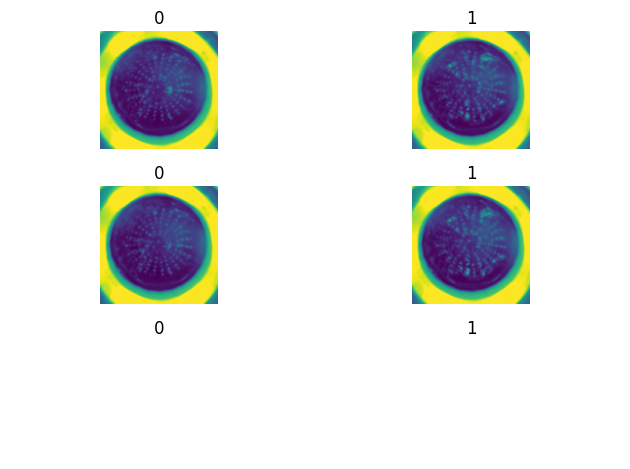

In [6]:
import matplotlib.pyplot as plt 
subX,y=getsubset("PLAplus","Ender",dataset,X)
print(subX.shape)
plt.subplot(3,2,1)
plt.imshow(subX[0][1])
plt.title(y[0])
plt.axis("off")

plt.subplot(3,2,2)
plt.imshow(subX[2][1])
plt.title(y[2])
plt.axis("off")

subX,y=getsubset("PLAminus","Ender",dataset,X)
plt.subplot(3,2,3)
plt.imshow(subX[0][1])
plt.title(y[0])
plt.axis("off")

plt.subplot(3,2,4)
plt.imshow(subX[2][1])
plt.title(y[2])
plt.axis("off")

subX,y=getsubset("PLAminus","Ender",dataset,X)
plt.subplot(3,2,5)
plt.title(subX[0][1])
plt.title(y[0])
plt.axis("off")

plt.subplot(3,2,6)
plt.title(subX[2][1])
plt.title(y[2])
plt.axis("off")
plt.tight_layout()
plt.show()

##### PCA

(500, 1, 150, 150)
(600, 1, 150, 150)
(600, 1, 150, 150)
(500, 1, 150, 150)
(600, 1, 150, 150)
(600, 1, 150, 150)
(500, 1, 150, 150)
(600, 1, 150, 150)
(500, 1, 150, 150)


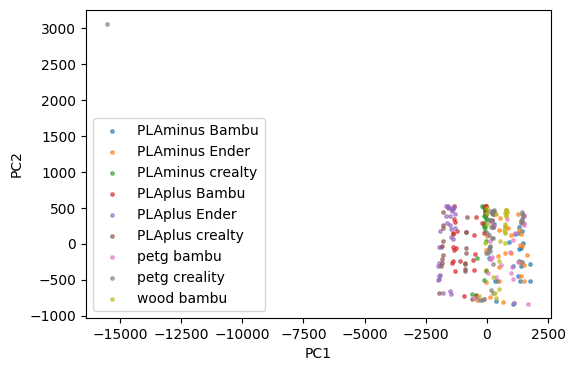

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
unique_filament = dataset["Filament"].unique()
unique_printer = dataset["Printer"].unique()
X_ = np.array([])
for filament in unique_filament:
    for printer in unique_printer:
        subX,y=getsubset(filament,printer,dataset,X)
        if len(subX)>0:
            print(subX.shape)
            if len(X_)==0: X_=subX.copy().reshape(len(subX),-1)
            else: X_ = np.vstack([X_,subX.reshape(len(subX),-1)])
        

pca = PCA(n_components=2).fit(X_)
Z = pca.transform(X_)  # (N,3)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
rolling_length=0
for filament in unique_filament:
    for printer in unique_printer:
        subX,y=getsubset(filament,printer,dataset,X,pressure="P40")
        if len(subX)>0:
            Zs = Z[rolling_length:rolling_length+len(subX)]
            
            rolling_length+=len(subX)
            ax.scatter(Zs[::10,0], Zs[::10,1], label=filament+" "+printer, s=6, alpha=0.6)

ax.legend(); ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
plt.show()

#### ML

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

##### RFC PCA

In [52]:
def coral_align_target_to_source(Xs, Xt, eps=1e-6):
    """
    Align target Xt to source Xs distribution (target -> source).
    Xs, Xt: (N, D) feature arrays (float)
    Returns Xt_aligned with same mean as Xs and covariance aligned to Xs.
    """
    # center
    mu_s = Xs.mean(axis=0, keepdims=True)
    mu_t = Xt.mean(axis=0, keepdims=True)
    Xs_c = Xs - mu_s
    Xt_c = Xt - mu_t

    # covariances with small ridge
    cov_s = np.cov(Xs_c, rowvar=False) + np.eye(Xs_c.shape[1]) * eps
    cov_t = np.cov(Xt_c, rowvar=False) + np.eye(Xt_c.shape[1]) * eps

    # matrix square-roots via SVD
    Us, Ss, _ = np.linalg.svd(cov_s)
    Ut, St, _ = np.linalg.svd(cov_t)
    # cov_s^{1/2} and cov_t^{-1/2}
    cov_s_sqrt = Us @ np.diag(np.sqrt(Ss)) @ Us.T
    cov_t_inv_sqrt = Ut @ np.diag(1.0/np.sqrt(St)) @ Ut.T

    # transform target: Xt_aligned = (Xt_c @ cov_t^{-1/2}) @ cov_s^{1/2} + mu_s
    Xt_aligned = (Xt_c @ cov_t_inv_sqrt) @ cov_s_sqrt + mu_s
    return Xt_aligned

In [56]:
subX,y=getsubset("PLAplus","Ender",dataset,X,augment=1)
pca = PCA(n_components=25)
train_X, test_X, train_y, test_y = train_test_split(subX.reshape((len(subX),-1)), y, test_size=0.2, random_state=np.random.randint(0,100))
train_X= pca.fit_transform(train_X.reshape(len(train_X), -1))
test_X = pca.transform(test_X)
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print("Test",accuracy * 100, "%")
y_pred = clf.predict(train_X)
accuracy = accuracy_score(train_y, y_pred)
print("Train",accuracy * 100, "%")
subX,y=getsubset("PLAminus","Ender",dataset,X)
subX = pca.transform(subX.reshape((len(subX),-1)))
subX_aligned=coral_align_target_to_source(train_X.copy(), subX.copy())
y_pred = clf.predict(subX_aligned)
accuracy = accuracy_score(y, y_pred)
print("Other filament",accuracy * 100, "%")

Test 99.58333333333333 %
Train 100.0 %
Other filament 54.0 %


##### class predictions

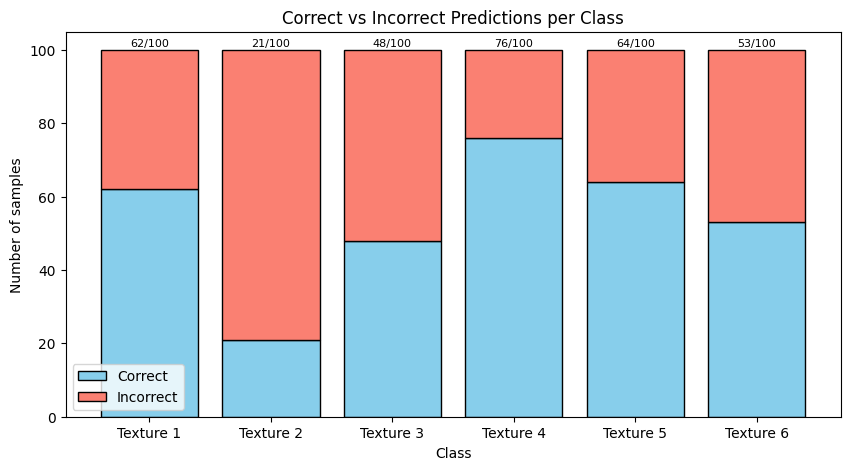

In [57]:
cm = confusion_matrix(y, y_pred, labels=np.unique(y))
class_labels = ["Texture "+str(i+1) for i in np.unique(y)]

correct_counts = cm.diagonal()
total_counts = cm.sum(axis=1)
incorrect_counts = total_counts - correct_counts

# --- stacked bar plot ---
plt.figure(figsize=(10,5))
bars_correct = plt.bar(class_labels, correct_counts, label="Correct", color="skyblue", edgecolor="black")
bars_incorrect = plt.bar(class_labels, incorrect_counts, bottom=correct_counts, 
                         label="Incorrect", color="salmon", edgecolor="black")

plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Correct vs Incorrect Predictions per Class")
plt.legend()

# annotate total counts above bars
for i, (c, ic, tot) in enumerate(zip(correct_counts, incorrect_counts, total_counts)):
    plt.text(i, tot+0.5, f"{c}/{tot}", ha="center", va="bottom", fontsize=8)

plt.show()

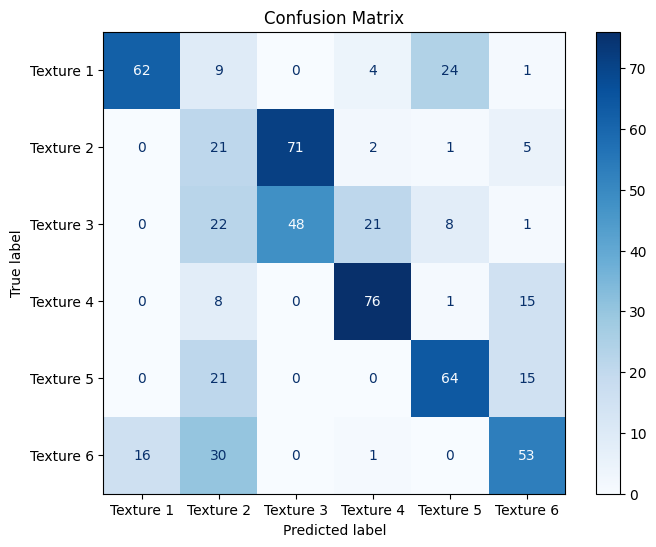

In [58]:
cm = confusion_matrix(y, y_pred, labels=np.unique(y))
class_labels = ["Texture "+str(i+1) for i in np.unique(y)]

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
plt.title("Confusion Matrix")
plt.savefig("/its/home/drs25/3D-textures/assets/confusion_RFC.pdf")
plt.show()

##### non pca

In [42]:
subX,y=getsubset("PLAplus","Ender",dataset,X)
train_X, test_X, train_y, test_y = train_test_split(subX.reshape((len(subX),-1)), y, test_size=0.2, random_state=np.random.randint(0,100))
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)
accuracy = accuracy_score(test_y, y_pred)
print("Test",accuracy * 100, "%")
y_pred = clf.predict(train_X)
accuracy = accuracy_score(train_y, y_pred)
print("Train",accuracy * 100, "%")
subX,y=getsubset("PLAminus","Ender",dataset,X)
subX = subX.reshape((len(subX),-1))
y_pred = clf.predict(subX)
accuracy = accuracy_score(y, y_pred)
print("Other filament",accuracy * 100, "%")

Test 97.5 %
Train 100.0 %
Other filament 34.333333333333336 %


##### class predictions

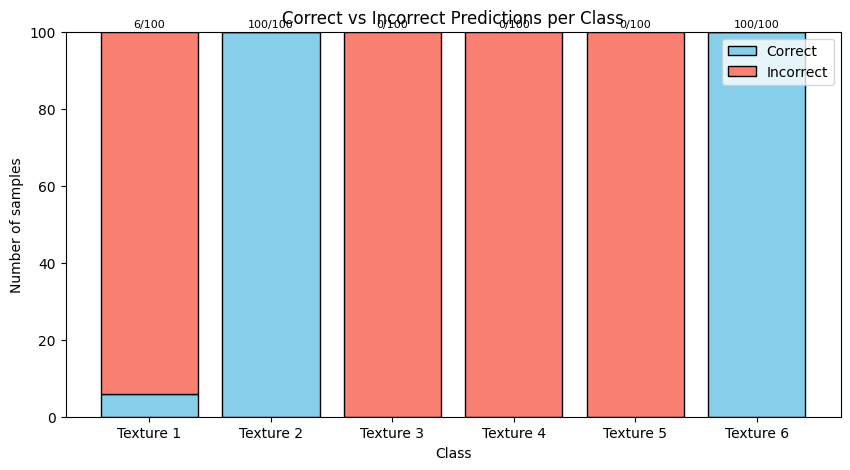

In [43]:
cm = confusion_matrix(y, y_pred, labels=np.unique(y))
class_labels = ["Texture "+str(i+1) for i in np.unique(y)]

correct_counts = cm.diagonal()
total_counts = cm.sum(axis=1)
incorrect_counts = total_counts - correct_counts

# --- stacked bar plot ---
plt.figure(figsize=(10,5))
bars_correct = plt.bar(class_labels, correct_counts, label="Correct", color="skyblue", edgecolor="black")
bars_incorrect = plt.bar(class_labels, incorrect_counts, bottom=correct_counts, 
                         label="Incorrect", color="salmon", edgecolor="black")

plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Correct vs Incorrect Predictions per Class")
plt.legend()

# annotate total counts above bars
for i, (c, ic, tot) in enumerate(zip(correct_counts, incorrect_counts, total_counts)):
    plt.text(i, tot+0.5, f"{c}/{tot}", ha="center", va="bottom", fontsize=8)

plt.show()

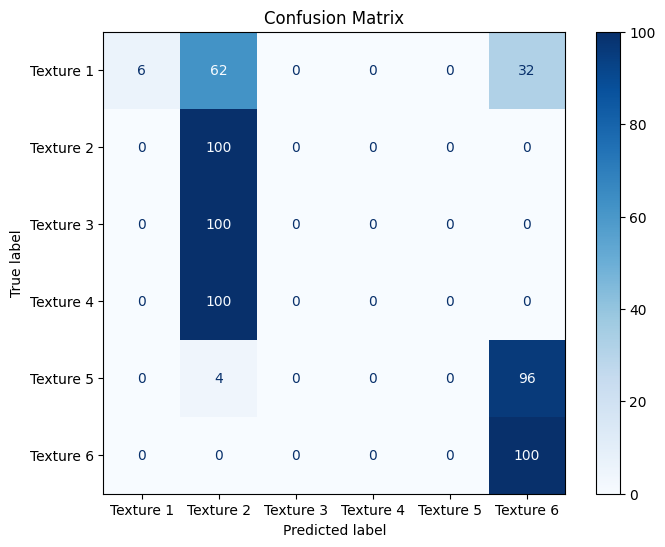

In [44]:
cm = confusion_matrix(y, y_pred, labels=np.unique(y))
class_labels = ["Texture "+str(i+1) for i in np.unique(y)]

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
plt.title("Confusion Matrix")
plt.show()

##### test robust

In [50]:
unique_filament = dataset["Filament"].unique()
unique_printer = dataset["Printer"].unique()
n = len(unique_filament) * len(unique_printer)
matrix = np.zeros((n, n, 20, 2))
torch.cuda.empty_cache()
num_classes = 6
n_idx = 0

for filament in unique_filament:
    for printer in unique_printer:
        train_X, train_y = getsubset(filament, printer, dataset, X,augment=1)
        pca = PCA(n_components=25)
        if len(train_X)>0:
            train_X= pca.fit_transform(train_X.reshape(len(train_X), -1))
            m_idx = 0
            for filament_other in unique_filament:
                for printer_other in unique_printer:
                    
                    if not (filament == filament_other and printer == printer_other):
                        test_X, test_y = getsubset(filament_other, printer_other, dataset, X)
                        if len(test_X)>0:
                            test_X = pca.transform(test_X.reshape(len(test_X), -1))
                            mean_train = train_X.mean(axis=0)
                            mean_other = test_X.mean(axis=0)
                            test_X = test_X - (mean_other - mean_train)
                            print(filament,printer,filament_other,printer_other,"\n\n",n_idx,m_idx,np.average(matrix),train_X.shape,train_y.shape,test_X.shape,test_y.shape)
                            for i in range(20):
                                clf = RandomForestClassifier(max_depth=50, random_state=np.random.randint(0,100))
                                clf.fit(train_X.reshape((len(train_X),-1)), train_y)
                                y_pred = clf.predict(test_X.reshape((len(test_X),-1)))
                                test_acc = accuracy_score(test_y, y_pred)
                                y_pred = clf.predict(train_X.reshape((len(train_X),-1)))
                                train_acc = accuracy_score(train_y, y_pred)
                                matrix[n_idx][m_idx][i][0] = test_acc
                                matrix[n_idx][m_idx][i][1] = train_acc
                                
                                gc.collect()
                            av=np.average(matrix[n_idx][m_idx],axis=0)
                            print(av[0]*100,"%",av[1]*100,"%")
                            np.save("/its/home/drs25/3D-textures/Experimental/data/matrix_RFC_gel.npy", matrix)
                            

                    m_idx += 1
            n_idx += 1


PLAminus Ender PLAplus Ender 

 0 1 0.0 (2400, 25) (2400,) (600, 25) (600,)
56.54999999999999 % 100.0 %
PLAplus Ender PLAminus Ender 

 1 0 0.19568750000000001 (2400, 25) (2400,) (600, 25) (600,)
61.441666666666684 % 100.0 %


#### NN

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import gc
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# ------------------------------------------------------------------
# CNN definition with auto-calculated fc1 size
# ------------------------------------------------------------------
class CNN(nn.Module):
    def __init__(self, num_classes, input_channels):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = None
        self.fc2 = None
        self.relu = nn.ReLU()

        # defer fc layer creation until we know final size
        self._dummy_init_done = False
        self.num_classes = num_classes

    def _init_fc(self, x):
        """Create fully connected layers once we know the feature size."""
        in_features = x.view(x.size(0), -1).shape[1]
        self.fc1 = nn.Linear(in_features, 128).to(x.device)
        self.fc2 = nn.Linear(128, 128).to(x.device)
        self.fc3 = nn.Linear(128, self.num_classes).to(x.device)
        self._dummy_init_done = True

    def forward(self, x):
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        if not self._dummy_init_done:
            self._init_fc(x)
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
class SimpleANN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleANN, self).__init__()
        # Input layer to hidden layer
        self.fc1 = nn.Linear(input_size, hidden_size)
        # Hidden layer to hidden layer (optional)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        # Hidden layer to output layer
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    def forward(self, x):
        # Apply ReLU activation for hidden layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        # Output layer (no activation if using CrossEntropyLoss)
        x = self.fc3(x)
        return x
# ------------------------------------------------------------------
# Training routine (similar to testCNN)
# ------------------------------------------------------------------
def train_model(train_X, train_y, test_X, test_y, params, epochs=100, batch_size=32,arch=CNN,):
    # Permute to (N, C, H, W)
    if len(train_X.shape)>2:
        train_X = np.transpose(train_X, (0, 3, 1, 2))
        test_X = np.transpose(test_X, (0, 3, 1, 2))
        train_X=(np.max(train_X)-train_X)/(np.max(train_X)-np.min(train_X))
        test_X=(np.max(test_X)-test_X)/(np.max(test_X)-np.min(test_X))
    # Convert to torch tensors
    train_X = torch.tensor(train_X, dtype=torch.float32)
    test_X = torch.tensor(test_X, dtype=torch.float32)
    train_y = torch.tensor(train_y)
    test_y = torch.tensor(test_y)

    train_dataset = TensorDataset(train_X, train_y)
    test_dataset = TensorDataset(test_X, test_y)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = arch(*params).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(epochs):
        #model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            X_batch=X_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch.to(device))
            loss.backward()
            optimizer.step()
            torch.cuda.empty_cache()
        if epoch%20==0: print("Epoch",epoch," loss:",loss.item())

    # Evaluate
    def evaluate(loader):
        model.eval()
        correct, total, running_loss = 0, 0, 0.0
        with torch.no_grad():
            for X_batch, y_batch in loader:
                outputs = model(X_batch.to(device))
                loss = criterion(outputs, y_batch.to(device))
                running_loss += loss.item()
                predicted = torch.argmax(outputs.cpu(), axis=1)
                correct += (predicted == torch.argmax(y_batch, axis=1)).sum().item()
                total += y_batch.size(0)
        return running_loss / len(loader), correct / total

    test_loss, test_acc = evaluate(test_loader)
    train_loss, train_acc = evaluate(train_loader)
    return model, train_acc, test_acc

# ------------------------------------------------------------------
# Dataset splitting helpers
# ------------------------------------------------------------------


def get_y(y, num_classes):
    unique_labels = np.arange(num_classes)
    label_map = {label: i for i, label in enumerate(unique_labels)}
    y_mapped = np.array([label_map.get(l, -1) for l in y])
    y_cat = np.eye(num_classes)[y_mapped]
    return y_cat



##### CNN

In [81]:
# ------------------------------------------------------------------
# Main loop (similar to your Keras code)
# ------------------------------------------------------------------
unique_filament = dataset["Filament"].unique()
unique_printer = dataset["Printer"].unique()
n = len(unique_filament) * len(unique_printer)
matrix = np.zeros((n, n, 20, 2))
torch.cuda.empty_cache()
num_classes = 6
n_idx = 0
for filament in unique_filament:
    for printer in unique_printer:
        train_X, train_y = getsubset(filament, printer, dataset, X, True)
        if len(train_X)>0:
            train_y = get_y(train_y, num_classes)
            shape=train_X.shape
            train_X=train_X.reshape((shape[0],shape[1]*shape[2],shape[3], 1)).astype('float32')
            
            m_idx = 0
            for filament_other in unique_filament:
                for printer_other in unique_printer:
                    
                    if not (filament == filament_other and printer == printer_other):
                        test_X, test_y = getsubset(filament_other, printer_other, dataset, X)
                        if len(test_X)>0:
                            test_y = get_y(test_y, num_classes)
                            shape=test_X.shape
                            test_X = test_X.reshape((shape[0],shape[1]*shape[2],shape[3], 1)).astype('float32')
                            print(filament,printer,filament_other,printer_other,"\n\n",n_idx,m_idx,np.average(matrix),train_X.shape,train_y.shape,test_X.shape,test_y.shape)
                            for i in range(20):
                                model, train_acc, test_acc = train_model(
                                    train_X, train_y, test_X, test_y, (num_classes, test_X.shape[-1]), epochs=200,batch_size=64,arch=CNN
                                )
                                torch.cuda.empty_cache()
                                print(test_acc*100,"%",train_acc*100,"%")
                                matrix[n_idx][m_idx][i][0] = test_acc
                                matrix[n_idx][m_idx][i][1] = train_acc
                                matrix[m_idx][n_idx][i][0] = test_acc
                                matrix[m_idx][n_idx][i][1] = train_acc

                                del model
                                gc.collect()
                                np.save("/its/home/drs25/3D-textures/Experimental/data/matrix_CNN_gel.npy", matrix)

                    m_idx += 1
            n_idx += 1


PLAminus Ender PLAplus Ender 

 0 1 0.0 (2400, 150, 150, 1) (2400, 6) (600, 150, 150, 1) (600, 6)
Epoch 0  loss: 1.7933131270110607
Epoch 20  loss: 1.764554787427187
Epoch 40  loss: 1.6782447136938572
Epoch 60  loss: 1.6449026484042406
Epoch 80  loss: 1.5830982699990273
Epoch 100  loss: 1.597213588654995
Epoch 120  loss: 1.4281967747956514
Epoch 140  loss: 1.319458395242691
Epoch 160  loss: 1.3036827007308602
Epoch 180  loss: 1.3662274647504091
28.000000000000004 % 58.791666666666664 %
Epoch 0  loss: 1.802685670554638
Epoch 20  loss: 1.7536925934255123
Epoch 40  loss: 1.7736788131296635
Epoch 60  loss: 1.5861762259155512
Epoch 80  loss: 1.48021699488163
Epoch 100  loss: 1.5772069953382015
Epoch 120  loss: 1.5240867603570223
Epoch 140  loss: 1.4452669443562627
Epoch 160  loss: 1.3635963574051857
Epoch 180  loss: 1.5933506768196821
32.666666666666664 % 54.58333333333333 %
Epoch 0  loss: 1.7973228357732296
Epoch 20  loss: 1.7879930287599564
Epoch 40  loss: 1.7492026425898075
Epoch 60  los

##### ANN

In [63]:
# ------------------------------------------------------------------
# Main loop (similar to your Keras code)
# ------------------------------------------------------------------
unique_filament = dataset["Filament"].unique()
unique_printer = dataset["Printer"].unique()
n = len(unique_filament) * len(unique_printer)
matrix = np.zeros((n, n, 20, 2))
torch.cuda.empty_cache()
num_classes = 6
n_idx = 0
for filament in unique_filament:
    for printer in unique_printer:
        train_X, train_y = getsubset(filament, printer, dataset, X, True)
        pca = PCA(n_components=20)
        if len(train_X)>0:
            train_X= pca.fit_transform(train_X.reshape(len(train_X), -1))
            train_y = get_y(train_y, num_classes)
            m_idx = 0
            for filament_other in unique_filament:
                for printer_other in unique_printer:
                    
                    if not (filament == filament_other and printer == printer_other):
                        test_X, test_y = getsubset(filament_other, printer_other, dataset, X)
                        if len(test_X)>0:
                            test_X = pca.transform(test_X.reshape(len(test_X), -1)).astype('float32')
                            mean_train = train_X.mean(axis=0)
                            mean_other = test_X.mean(axis=0)
                            test_X = test_X - (mean_other - mean_train)
                            test_y = get_y(test_y, num_classes)
                            print(filament,printer,filament_other,printer_other,"\n\n",n_idx,m_idx,np.average(matrix),train_X.shape,train_y.shape,test_X.shape,test_y.shape)
                            for i in range(20):
                                model, train_acc, test_acc = train_model(
                                    train_X, train_y, test_X, test_y, (20,50,6), epochs=100,batch_size=64, arch=SimpleANN
                                )
                                torch.cuda.empty_cache()
                                print(test_acc*100,"%",train_acc*100,"%")
                                matrix[n_idx][m_idx][i][0] = test_acc
                                matrix[n_idx][m_idx][i][1] = train_acc
                                
                                del model
                                gc.collect()
                                np.save("/its/home/drs25/3D-textures/Experimental/data/matrix_ann_gel.npy", matrix)

                    m_idx += 1
            n_idx += 1


PLAminus Ender PLAplus Ender 

 0 1 0.0 (2400, 20) (2400, 6) (600, 20) (600, 6)
Epoch 0  loss: 0.20907050480379752
Epoch 20  loss: 0.06485894498111011
Epoch 40  loss: 0.0003720279174348473
Epoch 60  loss: 4.214621014209108e-05
Epoch 80  loss: 0.06012003562831647
37.333333333333336 % 99.70833333333333 %
Epoch 0  loss: 0.7928471571577873
Epoch 20  loss: 0.13996082341525984
Epoch 40  loss: 0.0025776404225852367
Epoch 60  loss: 0.11814403244034799
Epoch 80  loss: 1.4501698153202014e-05
46.833333333333336 % 99.66666666666667 %
Epoch 0  loss: 0.2674288714822666
Epoch 20  loss: 0.0021360172083928486
Epoch 40  loss: 0.0006198257953915487
Epoch 60  loss: 0.014092003467142344
Epoch 80  loss: 0.00014601447860318473
42.66666666666667 % 99.5 %
Epoch 0  loss: 3.1230689194606853
Epoch 20  loss: 0.00155895110882609
Epoch 40  loss: 0.0020996506889536803
Epoch 60  loss: 0.17436419765258493
Epoch 80  loss: 0.052387062842807586
43.5 % 99.58333333333333 %
Epoch 0  loss: 0.6271525692549069
Epoch 20  loss: 0

In [76]:
matrix=np.load("/its/home/drs25/3D-textures/Experimental/data/matrix_ann_gel.npy")#"/its/home/drs25/3D-textures/Experimental/data/matrix_CNN_gel.npy")#
print(matrix.shape)
train=matrix[:,:,:,1].flatten()
test=matrix[:,:,:,0].flatten()
train=train[train != 0]
test=test[test != 0]
np.average(train).item(),np.average(test).item()

(2, 2, 20, 2)


(0.99225, 0.44366666666666665)

### Test all classes on pretrained models

## Section C - Visualise

In [8]:
matrix

array([[[[0.        , 0.        ],
         [0.        , 0.        ],
         [0.        , 0.        ],
         ...,
         [0.        , 0.        ],
         [0.        , 0.        ],
         [0.        , 0.        ]],

        [[0.15777778, 0.42933333],
         [0.33333333, 0.392     ],
         [0.27222222, 0.53333333],
         ...,
         [0.22777778, 0.46933333],
         [0.16888889, 0.55866667],
         [0.32444444, 0.40933333]],

        [[0.08111111, 0.71333333],
         [0.01555556, 0.492     ],
         [0.21333333, 0.58666667],
         ...,
         [0.05333333, 0.50266667],
         [0.17666667, 0.46933333],
         [0.16666667, 0.36666667]],

        ...,

        [[0.        , 0.        ],
         [0.        , 0.        ],
         [0.        , 0.        ],
         ...,
         [0.        , 0.        ],
         [0.        , 0.        ],
         [0.        , 0.        ]],

        [[0.        , 0.        ],
         [0.        , 0.        ],
         [0.

## Processing across the same one

In [109]:
import pandas as pd
import numpy as np
X=np.load("/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/3DPrintedXgel.npy")
dataset=pd.read_csv("/its/home/drs25/3D-textures/Experimental/data/metagel.csv")
print("Dataset size:",X.shape,len(dataset))
dataset.head()


import cv2

z=dataset[(dataset['Pattern'] == "z5") & (dataset['Pressure'] == "P40")]
print(len(z))
z["Printer"] = z["Printer"].str.lower()  #normalize if needed
group_cols = ["Printer", "Filament"]
past=("none","none")
counter=0
d={}
for idx, row in z.iterrows():
    keys = tuple(row[c] for c in group_cols)
    if keys[0]!=past[0] or keys[1]!=keys[1]:
        counter=0
    if d.get(counter,False)!=False:
        d[counter].append(int(row['Index']))
    else:
        d[counter]=[int(row['Index'])]
    counter+=1
    past=keys



Dataset size: (5000, 1, 192, 256) 5000
250


/tmp/ipykernel_2033297/1710354845.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z["Printer"] = z["Printer"].str.lower()  #normalize if needed


In [70]:
# look at variance
m=[]
for key in d:
    frames=d[key]
    vals=X[frames]
    vals=vals.reshape((len(vals),-1))
    pixel_var=np.var(vals, axis=0)
    mean_var = np.mean(pixel_var)
    #print(mean_var/5461 *100, "%")
    m.append(mean_var/5461 *100)
print(sum(m)/len(m),"%")

2.2547136794890847 %


In [110]:
# which ones have the most variance
ids=[]
for key in d:
    frames=d[key]
    vals=X[frames]
    vals=vals.reshape((len(vals),-1))
    m=[]
    for i in range(len(vals)):
        subset = np.delete(vals, i, axis=0)
        pixel_var=np.var(subset, axis=0)
        mean_var = np.mean(pixel_var)
        #print(mean_var/5461 *100, "%")
        norm=mean_var/5461 *100
        m.append(norm)
    n=np.argmin(np.array(m))
    ids.append((frames[n],min(m)))
    
print("Classes ranked by variance from others:")

for c,_ in ids:
    vals=(z[z["Index"] == float(c)])
    filament=vals["Filament"].item()
    printer=vals["Printer"].item()
    if values.get(filament,False)!=False:
        values[filament]+=1
    else: values[filament]=1
    if values.get(printer,False)!=False:
        values[printer]+=1
    else: values[printer]=1

values

Classes ranked by variance from others:


{'PLAplus': 96,
 'crealty': 154,
 'PLAminus': 149,
 'petg': 55,
 'bambu': 75,
 'ender': 66,
 'creality': 5}

In [113]:
a=[]
for i in values:
    a.append(values[i])

for i in values:
    print(i,values[i]/sum(a) *100,"%")

PLAplus 16.0 %
crealty 25.666666666666664 %
PLAminus 24.833333333333332 %
petg 9.166666666666666 %
bambu 12.5 %
ender 11.0 %
creality 0.8333333333333334 %
